Run a "fit" of the TFR on simulated data (`SGA_TFR_simtest.fits` and `SGA_TFR_simtest_20240307.fits`, from Segev) to test how well `hyperfit` recovers the slope.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
from matplotlib import cm, colors
from matplotlib.patches import Ellipse
import matplotlib as mpl

from astropy.table import Table

import corner

from line_fits import param_invert, hyperfit_line

import sys
# sys.path.insert(1, '/global/u1/k/kadglass/DESI_SGA/TF/SV/')
sys.path.insert(1, '/Users/kdouglass/Documents/Research/DESI/PV_survey/code/TF/SV')
from help_functions import adjust_lightness

In [2]:
h = 1
H0 = 100*h

c = 3e5

q0 = 0.2

V0 = 2.5 # Set 0-pt of the TFR

# Data

Simulated data generated by Segev

In [4]:
simtest_num = 1

simtest_directory = '/global/cfs/cdirs/desi/science/td/pv/tfgalaxies/SV/sim/'

tdata = Table.read(simtest_directory + 'SGA_TFR_simtest_00' + str(simtest_num) + '.fits')
tdata[:5]

PermissionError: [Errno 13] Permission denied: '/global/cfs/cdirs/desi/science/td/pv/tfgalaxies/SV/sim/SGA_TFR_simtest_001.fits'

# Simulated TFR

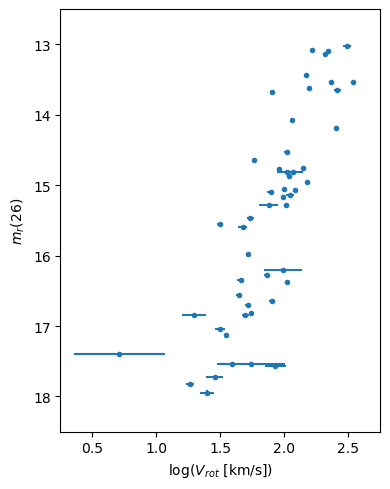

In [8]:
plt.figure(figsize=(4,5), tight_layout=True)

plt.errorbar(np.log10(tdata['V_0p33R26']), 
             tdata['R_MAG_SB26'], 
             xerr=0.434*tdata['V_0p33R26_err']/tdata['V_0p33R26'], 
             yerr=tdata['R_MAG_SB26_ERR'], 
             fmt='.')

plt.xlim([0.25, 2.75])
plt.ylim([18.5, 12.5])

plt.xlabel('log($V_{rot}$ [km/s])')
plt.ylabel('$m_r (26)$');

# Fit the ITFR using `hyperfit`

In [9]:
bounds_itfr = ((-1000.0, 1000.0), (-10.0, 10.0), (1.0e-5, 500.0))

w0, w1, sig_w, cov_w, itfr_mcmc_samples, hf_itfr = hyperfit_line(tdata['R_MAG_SB26'], 
                                                                 np.log10(tdata['V_0p33R26']) - V0, 
                                                                 tdata['R_MAG_SB26_ERR'], 
                                                                 0.434*tdata['V_0p33R26_err']/tdata['V_0p33R26'], 
                                                                 bounds_itfr)

             message: Optimization terminated successfully.
             success: True
                 fun: -62.79074208823314
                   x: [ 4.264e-01  2.251e+00  1.577e-01]
                 nit: 109
                nfev: 4970
          population: [[ 4.264e-01  2.251e+00  1.577e-01]
                       [ 4.262e-01  2.250e+00  1.577e-01]
                       ...
                       [ 4.266e-01  2.251e+00  1.577e-01]
                       [ 4.261e-01  2.250e+00  1.577e-01]]
 population_energies: [-6.279e+01 -6.279e+01 ... -6.279e+01 -6.279e+01]
                 jac: [ 1.030e-02 -1.022e-02 -1.148e-02]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6257.70it/s]


Niterations/Max Iterations:  1000 / 100000
Integrated ACT/Min Convergence Iterations:  [47.78446246 48.84674597 36.40903169] / 2442.3372983672466


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5989.92it/s]


Niterations/Max Iterations:  2000 / 100000
Integrated ACT/Min Convergence Iterations:  [65.60777915 66.56485205 42.1880834 ] / 3328.24260237285


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5893.58it/s]


Niterations/Max Iterations:  3000 / 100000
Integrated ACT/Min Convergence Iterations:  [74.54845957 75.15444515 41.72403524] / 3757.722257594373


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5564.79it/s]


Niterations/Max Iterations:  4000 / 100000
Integrated ACT/Min Convergence Iterations:  [81.94335743 82.48315265 43.24487958] / 4124.157632428804


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5447.61it/s]


Niterations/Max Iterations:  5000 / 100000
Integrated ACT/Min Convergence Iterations:  [74.57136713 75.57195304 42.06402162] / 3778.5976519188634


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5899.74it/s]


Niterations/Max Iterations:  6000 / 100000
Integrated ACT/Min Convergence Iterations:  [65.51658243 67.74613144 44.36435783] / 3387.306571907439


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5601.74it/s]


Niterations/Max Iterations:  7000 / 100000
Integrated ACT/Min Convergence Iterations:  [82.96188847 84.13575388 43.17465525] / 4206.787694072929


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5997.83it/s]


Niterations/Max Iterations:  8000 / 100000
Integrated ACT/Min Convergence Iterations:  [89.07012888 89.86977224 41.96439659] / 4493.488612107809


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5917.58it/s]


Niterations/Max Iterations:  9000 / 100000
Integrated ACT/Min Convergence Iterations:  [91.38248484 92.38483518 42.35390872] / 4619.241759036753


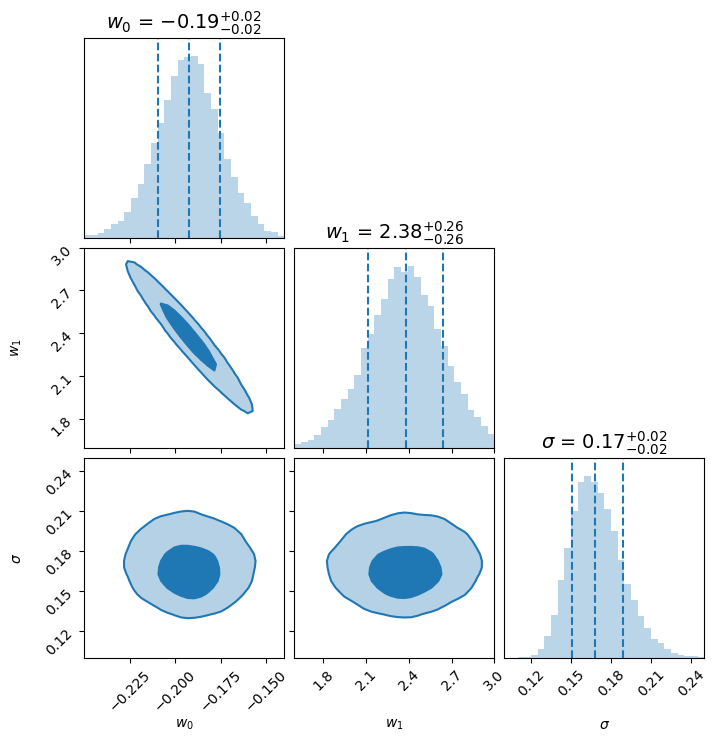

In [15]:
fig = corner.corner(itfr_mcmc_samples.T, bins=30, smooth=1,
                    range=[[-0.25, -0.14], [1.6, 3], [0.1, 0.25]],   # Range for w0, w1, sigma. Adjust as needed.
                    labels=['$w_0$', '$w_1$', r'$\sigma$'],
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)),
                    quantiles=[0.16, 0.5, 0.84],
                    color='tab:blue',
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3},
                    plot_datapoints=False,
                    fill_contours=True,
                    show_titles=True,
                    title = {'simulated data'},
                    title_kwargs={"fontsize": 14})

In [16]:
a_itfr, b_itfr, cov_itfr = param_invert(w0, w1, cov_w[:2,:2])

print(f'         w0: {w0:.3f} +/- {np.sqrt(cov_w[0,0]):.3f}')
print(f'         w1:  {w1:.2f}  +/- {np.sqrt(cov_w[1,1]):.2f}')
print(f'      slope: {a_itfr:.2f}  +/- {np.sqrt(cov_itfr[0,0]):.2f}')
print(f'y-intercept: {b_itfr:.2f}  +/- {np.sqrt(cov_itfr[1,1]):.2f}')

         w0: -0.192 +/- 0.017
         w1:  2.38  +/- 0.27
      slope: -5.20  +/- 0.48
y-intercept: 12.36  +/- 0.30


## Plot the TFR

In [17]:
# Invert the MCMC samples so that they represent (a, b) and not (w0, w1)
tfr_mcmc_samples = np.zeros(itfr_mcmc_samples.shape)

tfr_mcmc_samples[0] = 1./itfr_mcmc_samples[0]
tfr_mcmc_samples[1] = -itfr_mcmc_samples[1]/itfr_mcmc_samples[0]
tfr_mcmc_samples[2] = itfr_mcmc_samples[2]

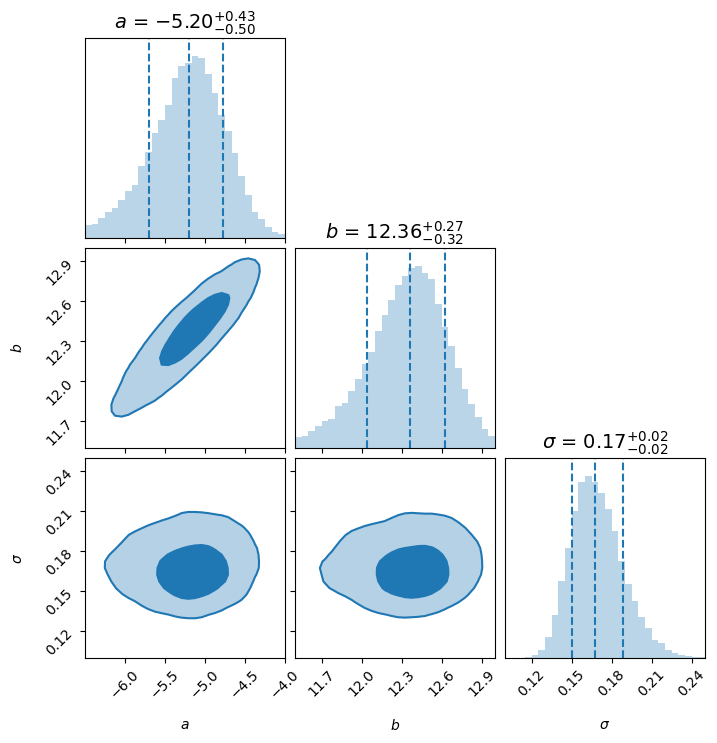

In [20]:
fig = corner.corner(tfr_mcmc_samples.T, bins=30, smooth=1,
                    range=[[-6.5, -4], [11.5, 13], [0.1, 0.25]],   # Range for a, b, sigma. Adjust as needed.
                    labels=['$a$', '$b$', r'$\sigma$'],
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)),
                    quantiles=[0.16, 0.5, 0.84],
                    color='tab:blue',
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3},
                    plot_datapoints=False,
                    fill_contours=True,
                    show_titles=True,
                    title = {'Coma'},
                    title_kwargs={"fontsize": 14});

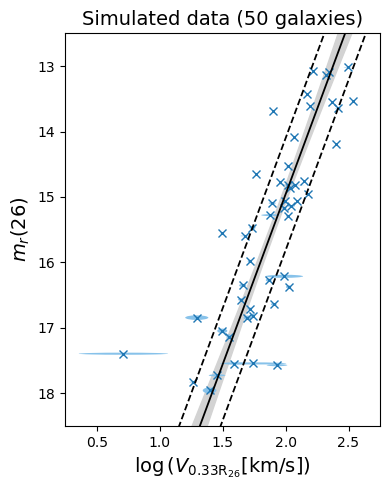

In [23]:
sigmas = hf_itfr.get_sigmas()
xvals = np.linspace(1., 3., 1000)
yvals = a_itfr * (xvals - V0) + b_itfr

# Get the MCMC 1-sigma quantiles to plot with the fit.
y_chain = np.outer(xvals - V0, tfr_mcmc_samples[0]) + tfr_mcmc_samples[1]
y_chain_quantiles = np.quantile(y_chain, [0.1587, 0.8414], axis=1)

# Pack info into data
data = [np.log10(tdata['V_0p33R26']), tdata['R_MAG_SB26']]
x_err = 0.434*tdata['V_0p33R26_err']/tdata['V_0p33R26']
y_err = tdata['R_MAG_SB26_ERR']
corr_xy = np.zeros_like(x_err)

# Generate ellipses
ells = [
    Ellipse(
        xy=[data[0][i], data[1][i]],
        width=2*y_err[i],
        height=2*x_err[i],
        angle=np.rad2deg(np.arccos(corr_xy[i])),
    )
    for i in range(len(data[0]))
]

# Make the plot
fig, ax = plt.subplots(figsize=(4,5), tight_layout=True)
ax.fill_between(xvals, y_chain_quantiles[0], y_chain_quantiles[1], color="lightgray")
for i, e in enumerate(ells):
    ax.add_artist(e)
    e.set_facecolor(adjust_lightness('tab:blue', amount=1.75))
ax.plot(data[0], data[1], 'x')
ax.plot(xvals, yvals, c="k", marker="None", ls="-", lw=1.3)
ax.plot(xvals - hf_itfr.vert_scat, yvals, c="k", marker="None", ls="--", lw=1.3)
ax.plot(xvals + hf_itfr.vert_scat, yvals, c="k", marker="None", ls="--", lw=1.3)
ax.set_xlabel(r"$\log{(V_\mathrm{0.33R_{26}} [\mathrm{km/s}])}$", fontsize=14)
ax.set_ylabel(r"$m_r(26)$", fontsize=14)
ax.set_title("Simulated data ({} galaxies)".format(len(tdata)), fontsize = 14)
ax.set_xlim(0.25, 2.75)
ax.set_ylim(18.5, 12.5);